

# ✅ Visualize K-Means Clustering Results (Spark MLlib)

### **Goal**

* Load the **cluster assignment results**
* Plot clusters on a **2D graph**
* Color-code points by cluster
* Export the plot as an image

---

## 📌 1. Load Cluster Result File

Assuming you saved clustering results as:

```
output/kmeans_result/part-00000.csv
```

---

## ✅ 2. Python Script for Visualization

```python
import pandas as pd
import matplotlib.pyplot as plt

# Load the clustered results
df = pd.read_csv("output/kmeans_result/part-00000.csv")

# Convert feature column string to numeric list
df["features"] = df["features"].apply(lambda x: eval(x))

# Split into 2D coordinates
df["x"] = df["features"].apply(lambda v: v[0])
df["y"] = df["features"].apply(lambda v: v[1])

# Plot
plt.figure(figsize=(8,6))
plt.scatter(df["x"], df["y"], c=df["cluster"], cmap="viridis", s=50)

plt.title("K-Means Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

# Save plot
plt.savefig("kmeans_clusters.png")
plt.show()
```

---

## ✅ Output

You will get a plot similar to:

```
Clustered data points colored by cluster labels
```


## PySpark

Cluster Centers:
[7.89696614 3.07406566]
[4.9796554  8.08895223]
[2.10673445 2.05513195]


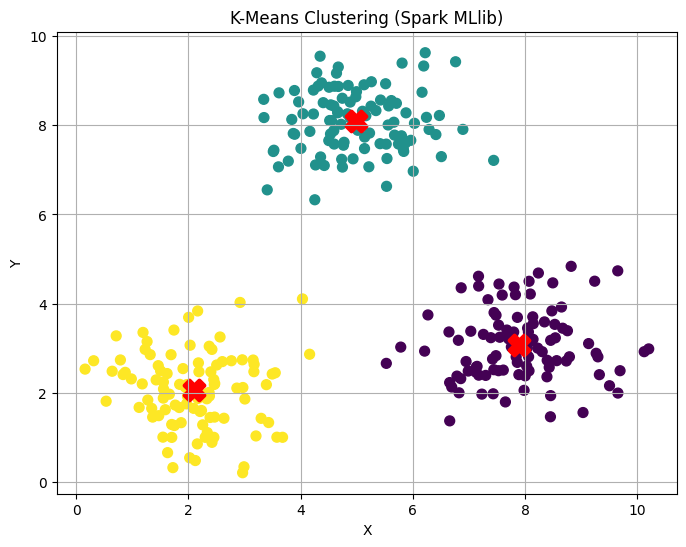

In [1]:
# ================================
# K-Means Clustering with Spark MLlib
# Random Dataset + Visualization
# ================================

import random
import numpy as np
import matplotlib.pyplot as plt

from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeans
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

# -------------------------------
# 1️⃣ Create Spark Session
# -------------------------------
spark = SparkSession.builder \
    .appName("KMeansClusteringExample") \
    .getOrCreate()

# -------------------------------
# 2️⃣ Generate Random Dataset
# -------------------------------

# Generate synthetic data around 3 centers
def generate_data(n=300):
    data = []
    centers = [(2, 2), (8, 3), (5, 8)]

    for center in centers:
        for _ in range(n // 3):
            x = random.gauss(center[0], 0.8)
            y = random.gauss(center[1], 0.8)
            data.append((float(x), float(y)))

    return data

data = generate_data(300)

# Create Spark DataFrame
df = spark.createDataFrame(data, ["x", "y"])

# -------------------------------
# 3️⃣ Convert Features to Vector
# -------------------------------
assembler = VectorAssembler(inputCols=["x", "y"], outputCol="features")
df_features = assembler.transform(df)

# -------------------------------
# 4️⃣ Train K-Means Model
# -------------------------------
kmeans = KMeans(k=3, seed=42, featuresCol="features", predictionCol="prediction")
model = kmeans.fit(df_features)

# -------------------------------
# 5️⃣ Make Predictions
# -------------------------------
predictions = model.transform(df_features)

# Show cluster centers
centers = model.clusterCenters()
print("Cluster Centers:")
for center in centers:
    print(center)

# -------------------------------
# 6️⃣ Convert to Pandas for Plotting
# -------------------------------
pandas_df = predictions.select("x", "y", "prediction").toPandas()

# -------------------------------
# 7️⃣ Visualization
# -------------------------------
plt.figure(figsize=(8,6))

# Scatter plot by cluster
scatter = plt.scatter(
    pandas_df["x"],
    pandas_df["y"],
    c=pandas_df["prediction"],
    cmap="viridis",
    s=50
)

# Plot cluster centers
for center in centers:
    plt.scatter(center[0], center[1],
                color='red', marker='X', s=200, linewidths=3)

plt.title("K-Means Clustering (Spark MLlib)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

# -------------------------------
# Stop Spark
# -------------------------------
spark.stop()